In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, fbeta_score, precision_score, recall_score, accuracy_score, auc, roc_curve

### Data Preprocessing

In [2]:
# Set the seed for reproducibility
np.random.seed(1)

In [3]:
X = np.random.uniform(100, 200, size=(1000, 1))  # create a dataset having uniform distribution
X[:10]

array([[141.70220047],
       [172.03244934],
       [100.01143748],
       [130.23325726],
       [114.67558908],
       [109.23385948],
       [118.62602114],
       [134.5560727 ],
       [139.67674742],
       [153.8816734 ]])

In [4]:
X_scaled = MinMaxScaler().fit_transform(X)
X.shape

(1000, 1)

In [5]:
Y = np.array([0] * 500 + [1] * 500)
np.random.shuffle(Y)
Y.shape

(1000,)

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, train_size=0.95, random_state=42, stratify=Y)
X_train.shape, X_test.shape

((950, 1), (50, 1))

In [7]:
np.unique(Y_train, return_counts=True)

(array([0, 1]), array([475, 475], dtype=int64))

### Training

In [8]:
LoR = LogisticRegression()
LoR.fit(X_train,Y_train)

LogisticRegression()

### Predicting

In [9]:
Yp_train = LoR.predict(X_train)
proba_train = LoR.predict_proba(X_train)
print(proba_train[:5])
print(Yp_train[:5])

[[0.49642793 0.50357207]
 [0.49881006 0.50118994]
 [0.50003531 0.49996469]
 [0.50670881 0.49329119]
 [0.49499137 0.50500863]]
[1 1 0 0 1]


In [10]:
Yp_test = LoR.predict(X_test)
proba_test = LoR.predict_proba(X_test)
print(proba_test[:5])
print(Yp_test[:5])

[[0.50163388 0.49836612]
 [0.49445808 0.50554192]
 [0.49564165 0.50435835]
 [0.49421227 0.50578773]
 [0.49468308 0.50531692]]
[0 1 1 1 1]


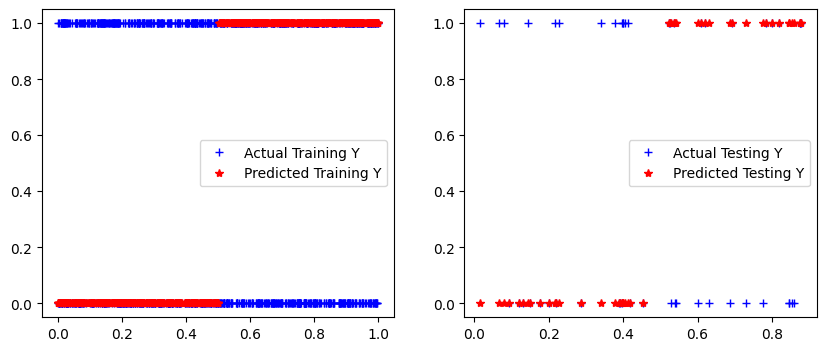

In [11]:
fig1, (sub1,sub2) = plt.subplots(ncols=2,figsize=(10,4))
sub1.plot(X_train,Y_train,'b+',label='Actual Training Y')
sub1.plot(X_train,Yp_train,'r*',label='Predicted Training Y')
sub1.legend(loc=0)

sub2.plot(X_test,Y_test,'b+',label='Actual Testing Y')
sub2.plot(X_test,Yp_test,'r*',label='Predicted Testing Y')
sub2.legend(loc=5)

### Evaluating

In [12]:
cm = confusion_matrix(Y_test, Yp_test)
print(cm)
print('TRUE NEGATIVES:', cm[0,0])
print('FALSE POSITIVES:', cm[0,1])
print('FALSE NEGATIVES', cm[1,0])
print('TRUE POSITIVES:', cm[1,1])

# hàng ngang bên trên là predicted values
# hàng dọc bên trái là actual values 

[[13 12]
 [13 12]]
TRUE NEGATIVES: 13
FALSE POSITIVES: 12
FALSE NEGATIVES 13
TRUE POSITIVES: 12


In [13]:
report = classification_report(Y_test,Yp_test)
print(report)

              precision    recall  f1-score   support

           0       0.50      0.52      0.51        25
           1       0.50      0.48      0.49        25

    accuracy                           0.50        50
   macro avg       0.50      0.50      0.50        50
weighted avg       0.50      0.50      0.50        50



In [14]:
# accuracy_score = (TN + TP) / (TN + TP + FP + FN)

# precision : true positives compared to predicted positives  -- precision = TP / (TP + FP)
#           => liệu prediction of positives có chuẩn không?

# recall/sensitivity/TPR : true positives compared to actual positives -- recall/sensitivity/TPR = TP / (TP + FN)
#           => liệu prediction of positives có đúng nhiều không khi so với actual positives?

# specificity : true negatives compared to actual negatives -- specificity = TN / (TN + FP)
#           => liệu prediction of negatives có đúng nhiều không khi so với actual negatives?

# FPR : false positives compared to actual negatives -- FPR = FP / (TN + FP) = 1 - specificity
#           liệu prediction of negatives có sai nhiều không khi so với actual negatives?

In [15]:
# f1_score : khó mà để cả precision & recall cao khi 2 metrics này ngược chiều -> sinh ra 1 metric mới để đánh giá

# f1_score = 2.(precision.recall) / (precision + recall) nằm trong khoảng [0,1]

# f_beta = (1 + b**2).(precision.recall) / (b**2.precision + recall)
    # coi trọng precision -> chọn b < 1
    # coi trọng recall -> chọn b > 1
    # coi trọng ngang nhau -> b = 1 (chính là f1_score)

Text(0, 0.5, 'True Positive Rate')

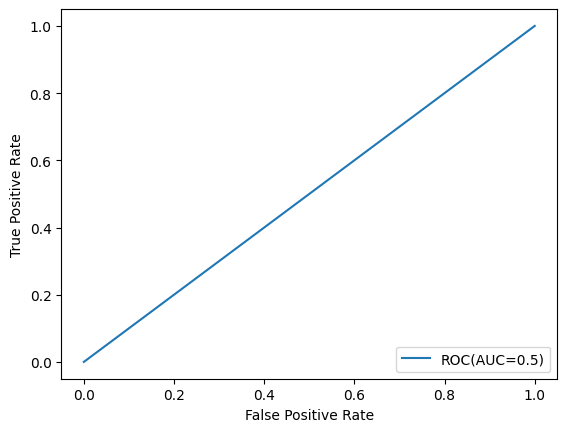

In [16]:
fpr, tpr, _ = roc_curve(Y_test,Yp_test)
auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC(AUC={})'.format(auc))
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')